# Quantrack Python crash course 10.

Notebooks of exercises on *Pandas* and *NumPy*

In [146]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Often in real-time, data includes the text columns, which are repetitive. Features like gender, country, and codes are always repetitive. These are the examples for categorical data.

Categorical variables can take on only a limited, and usually fixed number of possible values. Besides the fixed length, categorical data might have an order but cannot perform numerical operation. Categorical are a Pandas data type.

The categorical data type is useful in the following cases −

* A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory.

* The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order.

* As a signal to other python libraries that this column should be treated as a categorical variable (e.g. to use suitable statistical methods or plot types).

In [71]:
import os 

print(os.getcwd())
print()

print('This is our current working directory')

/Users/Cesar/Desktop/quantrack/qt_internal_training/python_course_beginners/data-sets

This is our current working directory


In [72]:
#command to change the directory
os.chdir('/Users/Cesar/Desktop/quantrack/qt_internal_training/python_course_beginners/data-sets')
print(os.getcwd())

/Users/Cesar/Desktop/quantrack/qt_internal_training/python_course_beginners/data-sets


### The Data-Sets

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this notebook, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [73]:
df_ = pd.read_csv('titanic_data.csv')
df_.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data-Dictionary

* **survival** : Survival	- 0 = No, 1 = Yes  
* **pclass** :Ticket class	1-upper = 1st, 2-middle = 2nd, 3-lower = 3rd  
* **sex** : Sex	  
* **Age** :Age in years  	
* **sibsp** : # of siblings / spouses aboard the Titanic  	
* **parch** :# of parents / children aboard the Titanic  	
* **ticket** : Ticket number  	
* **fare** : Passenger fare  	
* **cabin** : Cabin number  	
* **embarked** : Port of Embarkation  

### 1. Data pre-processing
### 2. Exploratory analysis 
### 3.Scatter plots between two variables

The data-set set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. *Survived* columns should be seen as a label column.

## 1. Data pre-processing 

### a. Ultimately, you want to predict *survived* columns - Remove irrelevant columns.

### b. Write a function to check if Data contains NaN values. Print number of lines containing NaN values

* Use dropna pandas function.

### c. Remove lines or columns based on your previous result - Now you should have a data-set ready for data analysis. 

* One column is particularly irrelevant.

### Solutions

### a. Remove useless columns

In [74]:
df_.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* PassengerId is same as the index  
* Name is not a relevant variable
* Ticket might be used in second instance but also seem irrelevant

In [75]:
#I choose column using [[ ]] syntax.
df_ = df_[['Survived','Pclass',
         'Sex','Age','SibSp',
         'Parch','Fare', 'Cabin', 'Embarked']]
df_.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.25,NaN,S


In [76]:
#I hate Capital letters
#I'm using map function to lowercase everything.
df_.columns = map(str.lower, df_.columns)
df_.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,0,3,male,22.0,1,0,7.25,NaN,S


### b. Print NaN values

In [77]:
#let's use isna function
df_.isna()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False


This is a bit hard to read, let's use sum.

In [78]:
#print Number of NaN values for each to
df_.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
cabin       687
embarked      2
dtype: int64

### c. Remove the useless columns

**Cabin** column contains way too much NaN values and should be dropped in first instance.

In [79]:
#Important to specify axis
df = df_.drop(['cabin'],axis = 1)

#### Bonus : Write-preprocessing function

We can write a function for all this tasks (on NaN values), let's call it our *pre-processing* function.

In [92]:
#let's compute ratio of NaN values
print(df_.isna().sum())
print()
print(df_.isna().sum()/len(df))

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
cabin       687
embarked      2
dtype: int64

survived    0.000000
pclass      0.000000
sex         0.000000
age         0.198653
sibsp       0.000000
parch       0.000000
fare        0.000000
cabin       0.771044
embarked    0.002245
dtype: float64


In [99]:
#let's convert it into a dict
nan_values = dict(df_.isna().sum()/len(df))
nan_values

{'survived': 0.0,
 'pclass': 0.0,
 'sex': 0.0,
 'age': 0.19865319865319866,
 'sibsp': 0.0,
 'parch': 0.0,
 'fare': 0.0,
 'cabin': 0.7710437710437711,
 'embarked': 0.002244668911335578}

In [112]:
#let's use dict comprehension to filter values
mydict = { key:value for (key,value) 
          in nan_values.items() if value > 0.2 }

print(mydict)

print('We will remove cabin column')

{'cabin': 0.7710437710437711}
We removed cabin column


Let's put it into a function

In [117]:
def remove_NaN(df,threshold=0.2):
    
    #create the dictionary
    nan_values_dict = dict(df_.isna().sum()/len(df))
    
    #we drop key.value pair corresponding to NaN value ratio > 0.2
    new_dict = { key:value for (key,value) 
                 in nan_values.items() if value > threshold }
    
    #we create the list of column to drop
    to_drop = new_dict.keys()
    
    #we drop it
    df = df.drop(to_drop,axis = 1)
    return df

In [122]:
#function test
remove_NaN(df_,0.2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## 2. Exploratory analysis

This data-set contains both *numerical* and *categorial* variables. Classic approach after pre-processings steps are : 

### a.  Plot bar charts for categorical data

* Use sns.countplot()

### b.  Plot value distribution for numerical data - Is our data-set skewed i.e numerical variables are not Gaussian approximation ?

Skewness refers to distortion or asymmetry in a symmetrical bell curve, or normal distribution, in a set of data.

### c. Analyse correlation between variables and vs our target - here it's the *survived* column.  


In [123]:
import seaborn as sns

### a. Bar charts for categorical data

Let's focus on columns that can only take a finite number of values :

* survived
* pclass
* sex
* embarked

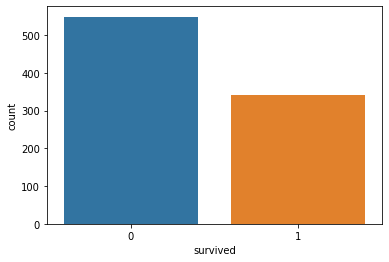

In [128]:
#plot for survived columns :
sns.countplot(x = 'survived', data = df)

Titanic was so sexist


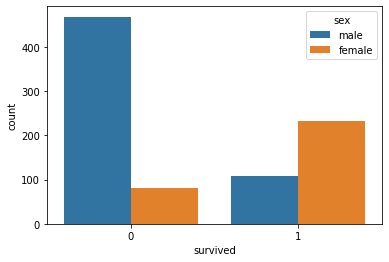

In [131]:
#Show survived value counts for two categorical variables:
sns.countplot(x="survived", hue="sex", data=df)
print('Titanic was so sexist')

Poor people are actually more present withing people that died, but is it significant ?


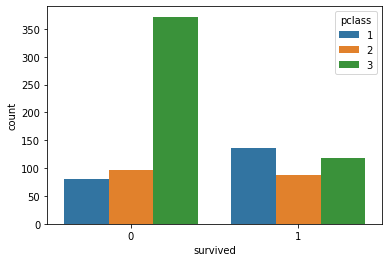

In [134]:
#Show survived value counts for another categorical variables:
sns.countplot(x="survived", hue="pclass", data=df)
print('Poor people are actually more present withing people that died, but is it significant ?')

There are more lower class people on board,
they are logically more represented in the casualties 


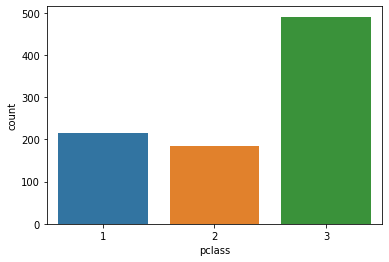

In [140]:
#let's plot social class distributions
sns.countplot(x="pclass", data=df)
print("""There are more lower class people on board,
they are logically more represented in the casualties """ )

It's obviously not sufficient but you can play around with seaborn commands to perform exploratory analysis

### c. Distribution plots for numerical variable

Let’s see agewise distribution of the passenger aboard the Titanic.

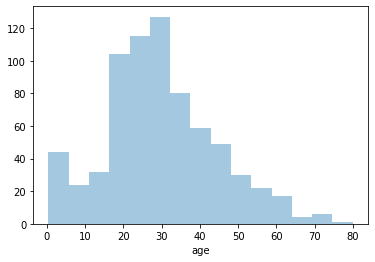

In [154]:
#Histogram of Age of the given data set(sample)
#plt.hist(titanic_cleaned['Age'].dropna())
sns.distplot(df['age'].dropna(), bins=15, kde=False)

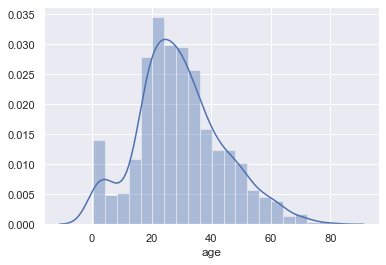

In [174]:
#let's make it a bit more beautiful
#sns.set(color_codes=True)
#note that we need to use dropna so seaborn can plot it
sns.distplot(df['age'].dropna())

Many passensgers are of age 15-40 yrs.

We would like to see agewise distribution of passsengers for both Genders. Let's do this by plotting the rows where ‘Sex’ is Male and Female respectively.

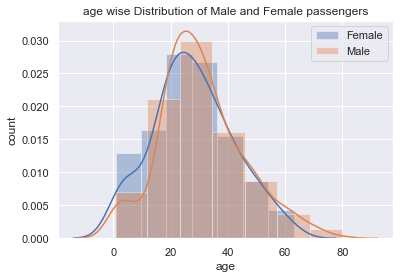

In [170]:
#age wise Distribution of Male and Female passengers
sns.distplot(df['age'][(df['sex'] == 'female')].dropna(), bins=7, label='Female')
sns.distplot(df['age'][(df['sex'] == 'male')].dropna(), bins=7, label='Male')

#we use plt. commands to set axis and other plot variables
plt.xlabel('age')
plt.ylabel('count')
plt.title('age wise Distribution of Male and Female passengers')
plt.legend()

This variable seem pretty much Gaussian, let's study other numerical variables :

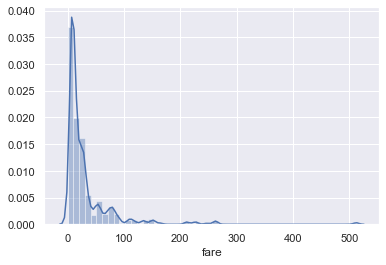

In [177]:
#fare variable plot
sns.distplot(df['fare'].dropna())

### c. Correlation analysis

In [179]:
#let's compute correlation matrix following nb.9 method
corr = df.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [180]:
#Let's filter upper triangle terms using numpy
corr.values[np.tril_indices_from(corr)] = np.nan
corr

,survived,pclass,age,sibsp,parch,fare
survived,NaN,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,NaN,NaN,-0.369226,0.083081,0.018443,-0.549500
age,NaN,NaN,NaN,-0.308247,-0.189119,0.096067
sibsp,NaN,NaN,NaN,NaN,0.414838,0.159651
parch,NaN,NaN,NaN,NaN,NaN,0.216225
fare,NaN,NaN,NaN,NaN,NaN,NaN


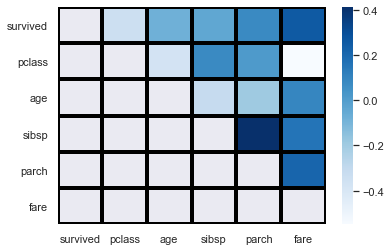

In [190]:
sns.heatmap(corr, cmap= 'Blues', linewidths=3, linecolor='black')

There are no big correlations in this data-set , it's not relevant to drop some columns

Reminder : Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.

## 3. Linear regression - A bit of theory 

We will use house-pricing data-set and use pre-processing functions of nb.9

In [198]:
dfp = pd.read_excel('house_price.xlsx')

#let's create a new list to change the name of the columns, and make it a bit more user-friendly
new_columns = [
            'transaction_date',
            'house_age',
            'distance_metro',
            'number_stores',
            'lat',
            'long',
            'area_price_unit']

#let's change the columns :
dfp.columns = new_columns

#let's drop lines containing NaN
dfp = dfp.dropna(how = 'any')

### a. A few explanation on linear regression

### b. Scatter plot and interpretations

### c. Jointplot and interpretations

**Linear Regression Basic**

        The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

        Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.
        
    
<img src="https://miro.medium.com/max/1160/1*weGmaJTZewji5_9H2TZetA.png">    

### 2. Scatter plots

A scatter plot is a two dimensional data visualization that shows the relationship between two numerical variables — one plotted along the x-axis and the other plotted along the y-axis.  

In [199]:
dfp.columns

Index(['transaction_date', 'house_age', 'distance_metro', 'number_stores',
       'lat', 'long', 'area_price_unit'],
      dtype='object')

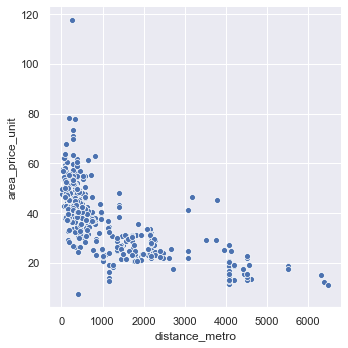

In [202]:
# Scatter plot
sns.relplot(y="area_price_unit", x="distance_metro", data=dfp);

It seems distance metro has a pretty easy-to-read influence on area_price_unit variable

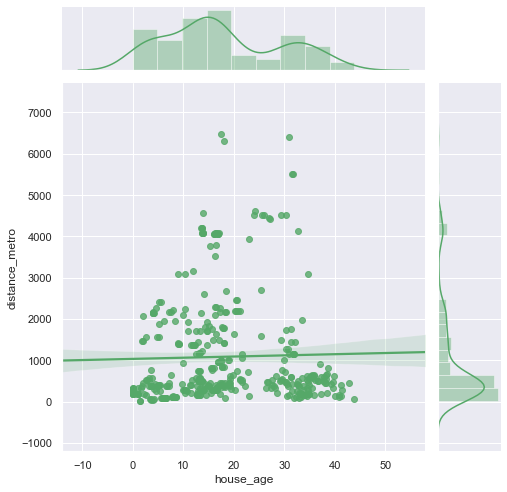

In [209]:
g = sns.jointplot("house_age", "distance_metro", data=dfp,
                  kind="reg", truncate=False,
                  color="g", height=7)

We can't conclude there is a significant relationship between these two variables